### 精度検証

In [ ]:
from kineticEQ import BGK1DPlot

config_holo = {
    "solver": "implicit",
    "implicit_solver": "holo",
    "ho_iter": 64,
    "lo_iter": 64,
    "ho_tol": 1e-6,
    "lo_tol": 1e-6,
    "tau_tilde": 5e-6,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-4,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_holo = BGK1DPlot(**config_holo)

In [ ]:
sim_holo.run_benchmark(benc_type="velocity", grid_list=[65, 129, 257, 513, 1025])
sim_holo.save_benchmark_results(filename="holo_benchmark")

In [ ]:
config_implicit = {
    "solver": "implicit",
    "implicit_solver": "backend",
    "picard_iter": 4096,
    "picard_tol": 1e-6,
    "tau_tilde": 5e-6,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-4,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_implicit = BGK1DPlot(**config_implicit)

In [ ]:
sim_implicit.run_benchmark(benc_type="velocity", grid_list=[65, 129, 257, 513, 1025])
sim_implicit.save_benchmark_results(filename="implicit_benchmark")

In [ ]:
config_explicit = {
    "solver": "explicit",
    "explicit_solver": "backend",
    "tau_tilde": 5e-6,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-7,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_explicit = BGK1DPlot(**config_explicit)

In [ ]:
sim_explicit.run_benchmark(benc_type="velocity", grid_list=[65, 129, 257, 513, 1025])
sim_explicit.save_benchmark_results(filename="explicit_benchmark")

In [ ]:
# 結果表示
tmp = sim_holo.load_benchmark_results("holo_benchmark")
err = sim_holo.compute_error(tmp)
sim_holo.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

In [ ]:
tmp = sim_implicit.load_benchmark_results(filename="implicit_benchmark")
err = sim_implicit.compute_error(tmp)
sim_implicit.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

In [ ]:
tmp = sim_explicit.load_benchmark_results(filename="explicit_benchmark")
err = sim_explicit.compute_error(tmp)
sim_explicit.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

No modifications detected for re-loaded extension module gtsv_batch, skipping build step...
Loading extension module gtsv_batch...
No modifications detected for re-loaded extension module explicit_fused, skipping build step...
Loading extension module explicit_fused...
NoneType: None
No modifications detected for re-loaded extension module implicit_fused, skipping build step...
Loading extension module implicit_fused...
NoneType: None
No modifications detected for re-loaded extension module lo_blocktridiag, skipping build step...
Loading extension module lo_blocktridiag...
NoneType: None


--- auto compile ---
--- auto compile complete ---
initiaze complete:
  solver: None
 ---- hyperparameter ----
  hyperparameter: tau_tilde=5e-07
 ---- space ----
  space: nx=1000, dx=0.0010, Lx=1.0
 ---- velocity ----
  velocity: nv=500, dv=0.0401, v_max=10.0
 ---- time ----
  time: nt=6, dt=0.0100, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU
--- compile cuSOLVER ---
--- compile CUDA fused explicit backend ---
--- fused CUDA backend loaded ---
--- compile CUDA fused implicit backend ---
--- fused CUDA backend loaded ---
--- compile LO block-tridiag backend ---
--- LO block-tridiag backend loaded ---
Running scheme comparison test with schemes: ['explicit', 'implicit', 'holo']
Time step sizes: [5e-07, 0.0005, 0.0005]
  Running explicit scheme (dt=5e-07)
--- explicit ---


Progress(explicit): 100%|██████████| 100001/100001 [00:32<00:00, 3050.99it/s]


  Running implicit scheme (dt=0.0005)
--- implicit ---


Progress(implicit): 100%|██████████| 101/101 [03:58<00:00,  2.36s/it]


  Running HOLO scheme (dt=0.0005)
--- HOLO ---


Progress(HOLO): 100%|██████████| 101/101 [00:08<00:00, 12.10it/s]


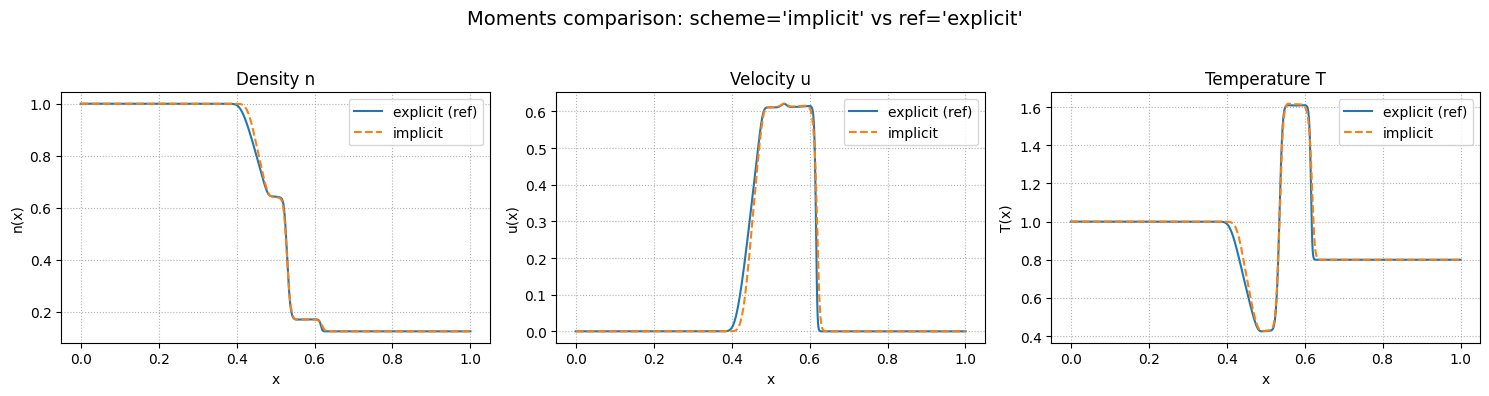

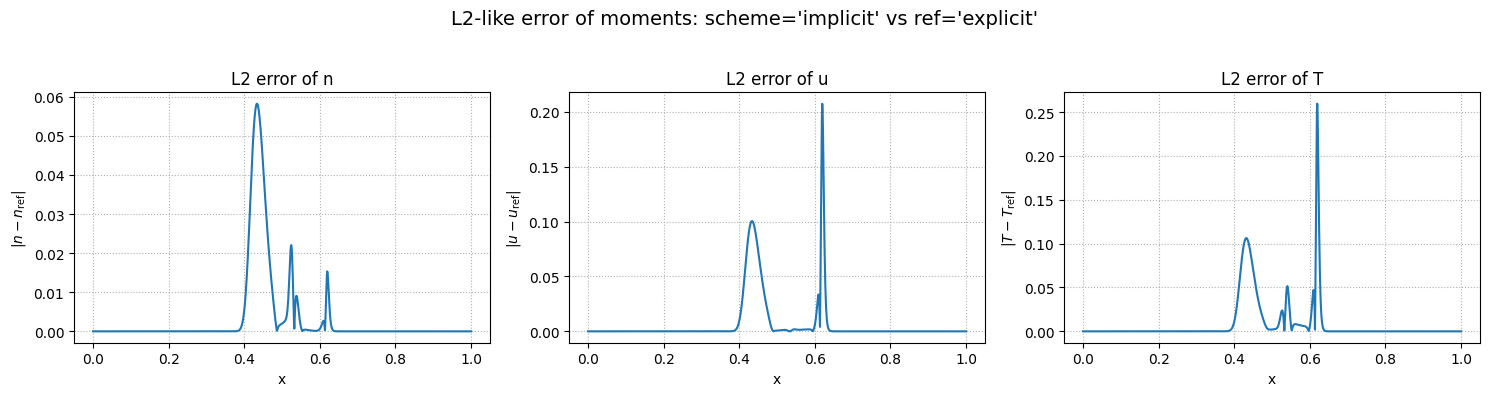

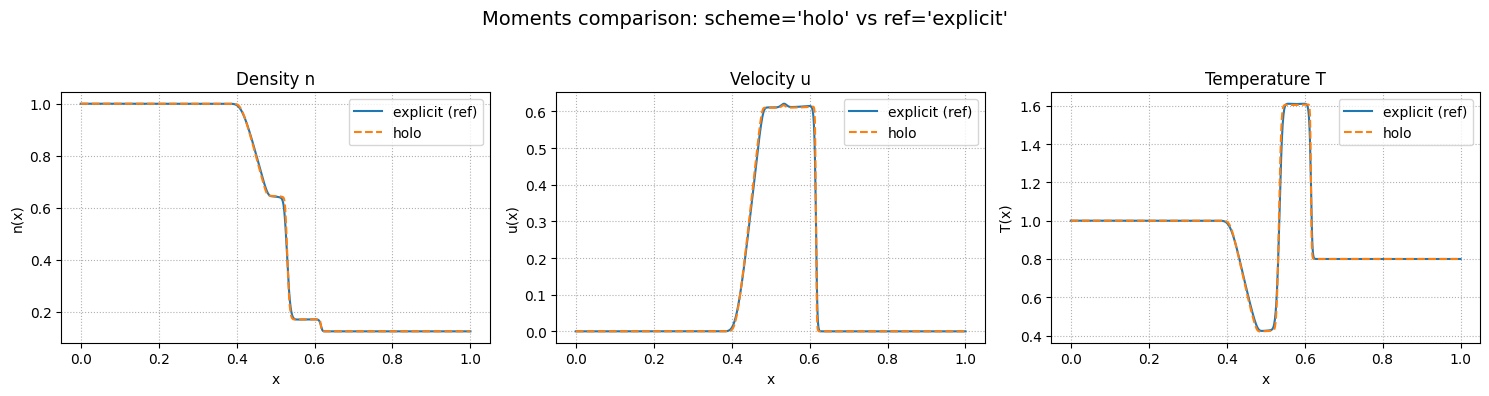

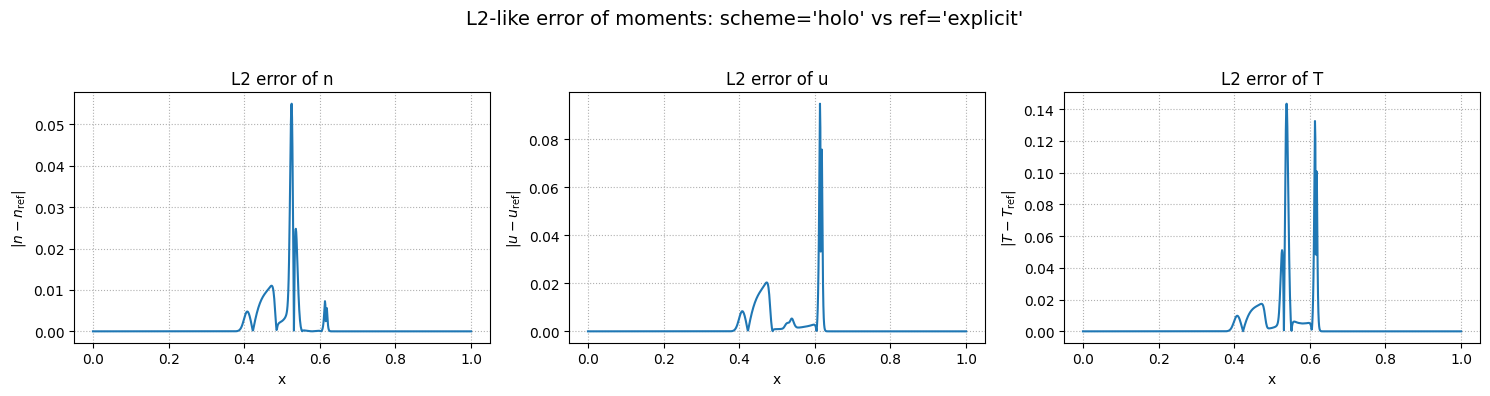

In [6]:
from kineticEQ import BGK1DPlot

config_cross_test = {
    "ho_iter": 4096,
    "lo_iter": 4096,
    "ho_tol": 1e-6,
    "lo_tol": 1e-6,
    "picard_iter": 4096,
    "picard_tol": 1e-6,

    "tau_tilde": 5e-7,
    "nx": 1000,
    "nv": 500,
    "v_max": 10.0,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_cross = BGK1DPlot(**config_cross_test)
sim_cross._run_scheme_comparison_test(scheme_list=["explicit", "implicit", "holo"], scheme_delta_t_list=[5e-7, 5e-4, 5e-4])
sim_cross.plot_cross_scheme_results(ref_scheme="explicit")